<font size = "6">This is an implementation of Linear regression with gradient descent from scratch

# Custom Linear Regression Implementation

In this notebook i will:

- Define a custom `LinearRegression` class with the following variables:
  - **m**: number of samples
  - **n**: number of features
  - **y**: target vector of shape (m × 1), column vector
  - **X**: feature matrix of shape (m × n), where rows are samples and columns are features
  - **w**: weight vector of shape (n × 1), column vector (one weight per feature)

The class will include the following methods:

- `__init__`: constructor with two parameters
  1. **learning_rate** (default = 0.01)  
  2. **iterations** (default = 10,000)
- `yhat`: computes predictions ŷ given **X** and a weight vector **w**
- `loss`: calculates the Mean Squared Error (MSE) between predictions and actual values
- `gradient_descent`: updates weights using the gradient of the loss
- `fit`: trains the model on input data **X** and **y**
- `predict`: generates predictions on new data


In [14]:
#Importing libraries:

from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import numpy as np

In [2]:
# m is the number of samples, n is the number of features
# y is the target vector (m×1), column vector
# X is the feature matrix (m×n), rows are samples, cols are features
# w is the weight vector (n×1), column vector (one weight per feature)

class LinearRegression():

# the constructor with some default values
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.loss_history = []
     
#This is a function that recieves X  - a feature matrix with sizes m*n (number of samples*number of features)
# and a weight vector (m*1) (one for each feature) and returns the product of wT*X which is a vector
# ŷ that is (m*1) (This is our estimation for our target vector y given a feature matrix and a weight vector).
#
# ŷ = w1x1+ w2x2+...wn*xn.

    def yhat(self, X, w):
        """ 
        X - ndarray of shape (m,n): Features matrix (m samples, n features)
        w - ndarray of shape (n,1): Weight vector (1 per feature)

        returns:
        ŷ - ndarray of shape (m,1): a vector of our estimates for the values in y
        """
        return np.dot(X,w)
# Given a ŷ and a y it computes the loss using the formula
#        Σ(ŷ-y)^2/m.
#
#        m - number of samples
#        ŷ - the models predictions
#        y - target vector
#  Σ(yhat-y)^2/m (number of samples)
    
    def loss(self,yhat,y):
        """
        ŷ - ndarray of shape (m,1): a vector of our estimates for the values in y
        y - ndarray of shape (m,1): target vector

        returns:
        L - float: the MSE for y and ŷ
        """
        L = 1/self.m * np.sum(np.power(yhat-y,2))
        return L
# This function returns the new w after the gradient descent.
#
# w = w - the learning rate * the derivative of the loss function with respect to w (the weight vector)
    def gradient_descent(self, w, X, y, yhat):
        """
       w - ndarray of shape (n,1): Weight vector 
       X - ndarray of shape (m,n): Features matrix
       y - ndarray of shape (m,1): target vector
       ŷ - ndarray of shape (m,1): a vector of our estimates for the values in y

       returns:
       w - ndarray of shape(n,1): new weight vector for the next iteration of gradient_descent
        """
        dLdW = (2/self.m) * X.T @ (yhat - y)

        w = w - self.learning_rate*dLdW

        return w

    def predict(self,X):
        """
        X - ndarray of shape (m,n): Features matrix

        returns:
        ŷ - ndarray of shape (m,1): a vector of our estimates for the values in y
        after the model has been fit.
        """
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        return self.yhat(X, self.w)
        
    def fit(self, X, y):
        """
        X - ndarray of shape (m,n): Features matrix
        y - ndarray of shape (m,1): target vector

        fits and trains the model on the features matrix X and the target vector y.
        """
        # Add bias col of 1s
        X = np.hstack([X, np.ones((X.shape[0], 1))])

        y = y.reshape(-1, 1)
        
        self.m = X.shape[0]  # number of samples
        self.n = X.shape[1]  # number of features (with bias)

        w = np.zeros((self.n, 1))

        for it in range(self.iterations):
            yhat = self.yhat(X, w)  # (m*1)
            loss = self.loss(yhat, y)  # scalar
            self.loss_history.append(loss)  # track loss
            w = self.gradient_descent(w, X, y, yhat)

            if it % 2000 == 0:
                print(f'The error at iteration {it} is {loss:.4f}')

        self.w  = w
    def score(self,X,y):
        """
         X - ndarray of shape (m,n): Features matrix
         y - ndarray of shape (m,1): target vector

         Before using score you have to fit the model on X and y

         returns:
         float: computes R^2 1-(sum of squared residuals/ sum of total squares)
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y-y_pred)**2)
        ss_total = np.sum((y-np.mean(y))**2)
        return (1.0 - (ss_res/ss_total))
        

In [5]:
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

custom_model = LinearRegression(learning_rate = 0.01, iterations = 10000)
custom_model.fit(X_train,y_train)
y_pred_custom = custom_model.predict(X_test)

sk_model= SklearnLR()
sk_model.fit(X_train,y_train)
y_pred_sklearn = sk_model.predict(X_test)


print("Custom model MSE:", mean_squared_error(y_test, y_pred_custom))
print("Scikit-learn model MSE:", mean_squared_error(y_test, y_pred_sklearn))

# Compare weights (custom_model includes bias as last weight)
print("\nCustom model weights (including bias):", custom_model.w.flatten())
print("Scikit-learn weights + intercept:", np.append(sk_model.coef_, sk_model.intercept_))

The error at iteration 0 is 5.6297
The error at iteration 2000 is 0.5184
The error at iteration 4000 is 0.5179
The error at iteration 6000 is 0.5179
The error at iteration 8000 is 0.5179
Custom model MSE: 0.5558929396387389
Scikit-learn model MSE: 0.5558915986952442

Custom model weights (including bias): [ 0.85239249  0.12238414 -0.30513674  0.3711501  -0.00229783 -0.03662403
 -0.89661202 -0.8689051   2.06786232]
Scikit-learn weights + intercept: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682  2.06786231]


### Plots for visualization

To visualize the data so we can interpret it clearly we will do the follwing plots:
<br>**Loss history over iterations (Plot 1):**

This plot shows the Mean Squared Error (MSE) decreases as the model trains. The curve indicates how quickly the model learns.

<br>**Predicted vs Actual data and a perfect prediction line of the custom model (Plot 2):**

Each point represents a test sample. The red line shows the perfect predictions. The closer the points are to the line indicate accurate predictions.

<br>**Predicted vs Actual data and a perfect prediction line of the sci-kit model (Plot 3):**

Same as plot 2 but for the Scikit-learn Linear Regression. 

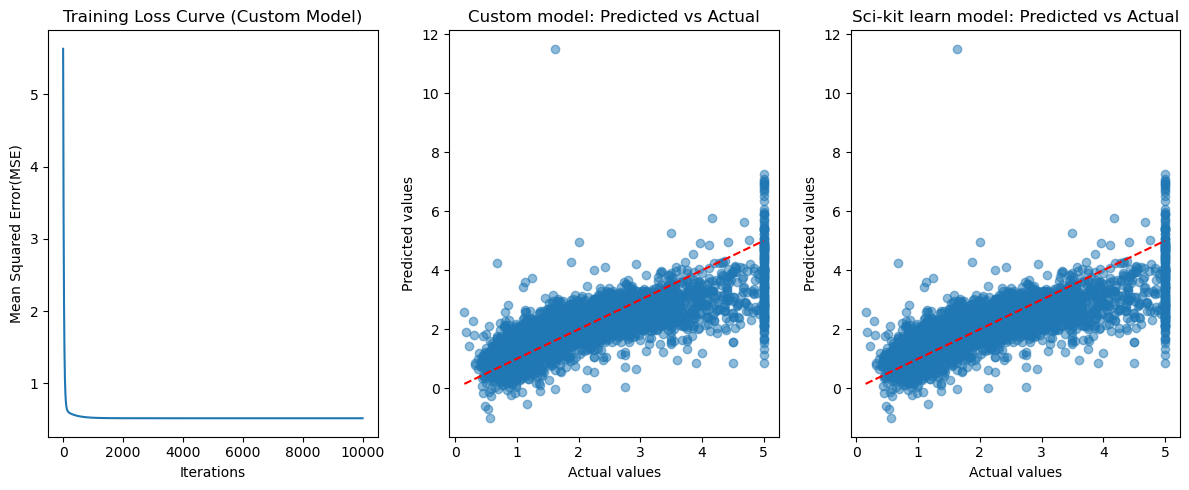

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(12,5))

axs[0].plot(custom_model.loss_history)
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Mean Squared Error(MSE)")
axs[0].set_title("Training Loss Curve (Custom Model)")

axs[1].scatter(y_test,y_pred_custom,alpha = .5)
axs[1].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color = "red", linestyle = "--")

axs[1].set_xlabel("Actual values")
axs[1].set_ylabel("Predicted values")
axs[1].set_title("Custom model: Predicted vs Actual")


axs[2].scatter(y_test,y_pred_sklearn,alpha = .5)
axs[2].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color = "red", linestyle = "--")

axs[2].set_xlabel("Actual values")
axs[2].set_ylabel("Predicted values")
axs[2].set_title("Sci-kit learn model: Predicted vs Actual")

plt.tight_layout()
plt.show()

### Results and Evaluation

The loss curve showsa rapid decrease in MSE during the first few hundred iterations, after which it levels off, indicating convergence.

Both Predicted vs Actual plots demonstrate that our custom model predicts values very close to the true targets.

Comparison with the Scikit-learn model shows nearly identical results, confirming the correctness of our implementation.


### Conclusion

Our custom Linear Regression model, implemented from scratch using gradient descent, successfully learns the underlying patterns in the data.

The model achieves comparable performance to Scikit-learn’s LinearRegression, validating both the weight calculations and convergence behavior.

This notebook demonstrates how linear regression can be implemented without using high-level libraries, providing insight into the mechanics of gradient descent and model fitting.